# Random Forest Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_decision_regions

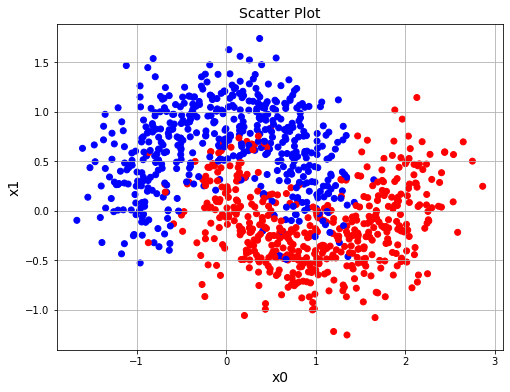

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, 
                  noise = 0.3, 
                  random_state=42)

colors = ["blue" if label == 0 else "red" for label in y]

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize=14)
plt.title("Scatter Plot", fontsize=14)
plt.grid();

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
tree = DecisionTreeClassifier(max_depth=15)
tree.fit(X_train, y_train)
tree_y_pred = tree.predict(X_test)
print(f"Decision Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")


forest = RandomForestClassifier(max_depth = 15, 
                                n_estimators = 500,
                                bootstrap = True)
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)
print(f"Random Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       156
           1       0.90      0.85      0.88       144

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300
 

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.94      0.91      0.92       144

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300
 



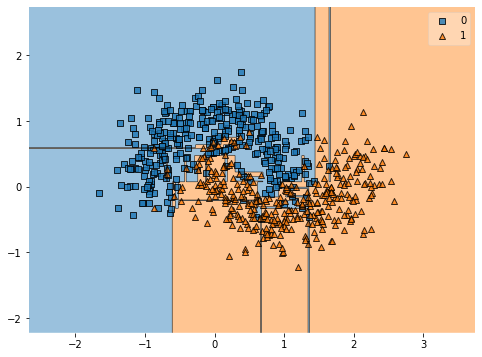

In [5]:
plt.figure(figsize = (8, 6))

plot_decision_regions(X_train, y_train, clf = tree);

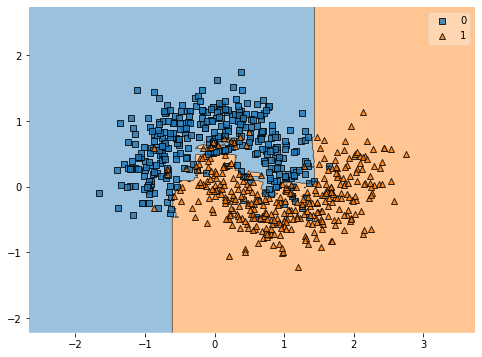

In [6]:
plt.figure(figsize = (8, 6))

plot_decision_regions(X_train, y_train, clf = forest);

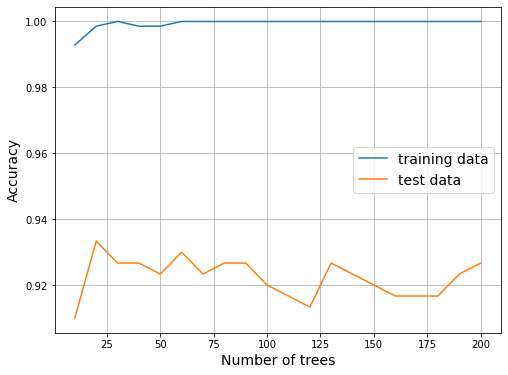

In [7]:
n_estimators = []
acc_train = []
acc_test = []

for i in range(10, 201, 10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, rfc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test)))
    
    n_estimators.append(i)
    
plt.figure(figsize=(8, 6))

plt.plot(n_estimators, acc_train, label="training data")
plt.plot(n_estimators, acc_test, label="test data")
plt.xlabel("Number of trees", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=14);
plt.grid();

In [8]:
rfc = RandomForestClassifier()

random_grid = {"n_estimators": range(10, 201, 10),
               "max_features": ["sqrt", "log2"],
               "max_depth": range(10, 101, 10)
              }

rfc_rs = RandomizedSearchCV(rfc, 
                            param_distributions = random_grid,
                            cv = 5, 
                            n_iter = 100, 
                            scoring = "accuracy")

rfc_rs.fit(X_train, y_train)

print(rfc_rs.best_params_)

print(rfc_rs.best_score_)

{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 10}
0.9157142857142857


In [9]:
rfc_rs.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=200)

In [10]:
accuracy_score(y_test, rfc_rs.best_estimator_.predict(X_test))

0.9233333333333333

In [11]:
importance = rfc_rs.best_estimator_.feature_importances_

feature_names = ["x0", "x1"]

for name, score in zip(feature_names, importance):
    print(name, score)

x0 0.4684293361671632
x1 0.5315706638328368


In [12]:
model = RandomForestClassifier(n_estimators = 20, 
                               max_features = "sqrt", 
                               max_depth = 10,
                               oob_score = True)

model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=20,
                       oob_score=True)

In [13]:
model.oob_score_

0.91

In [14]:
accuracy_score(y_test, model.predict(X_test))

0.9166666666666666